# **Linear Regression - SKLearn Diabetes Dataset**

Let us first import the pre-requisite libraries needed to perform the analysis


In [1]:
import pandas as pd  #for data manipulation.
import numpy as np   #for scientific computing.
import sklearn       #for machine learning
import seaborn as sns #visualization package
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt #plotting & visualization.

%matplotlib inline  
#to present the visualizations as a part of the notebook itself

*Let us import the dataset & create a dataframe*

In [2]:
#importing the inbuilt dataset in sklearn package for performing regression analysis.
from sklearn import datasets
diabetes = datasets.load_diabetes()

*Let us learn more about the dataset*

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

So we know the that the target/response/dependent varialble to be predicted is a continuous numerical value which is a measure of disease progression after one year.

The features/independent variables we have are the 10 attributes from Age to serum measurement samples

In [4]:
diabetes.feature_names   #checking the feature names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
diabetes.data.shape  #checking the shape of data

(442, 10)

**There are 10 variables & 442 instances/rows**

In [6]:
diabetes.target.shape

(442,)

**The Target Variable has 442 rows**

# Let us Create a Dataframe using this data

In [7]:
db_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

We created a pandas dataframe using the dataset.

In [8]:
db_df.sample(5)    #checking a sample of the dataframe

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
105,0.023546,0.050680,-0.032073,-0.040099,-0.031840,-0.021669,-0.013948,-0.002592,-0.010904,0.019633
277,-0.034575,-0.044642,-0.059019,0.001215,-0.053855,-0.078035,0.067048,-0.076395,-0.021394,0.015491
290,0.059871,0.050680,0.076786,0.025315,0.001183,0.016849,-0.054446,0.034309,0.029936,0.044485
424,0.001751,0.050680,0.011039,-0.019442,-0.016704,-0.003819,-0.047082,0.034309,0.024053,0.023775
379,-0.001882,-0.044642,-0.038540,0.021872,-0.108893,-0.115613,0.022869,-0.076395,-0.046879,0.023775


Note: As per dataset documentation: **"Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1)"**. That is the reason we see that the variables to have seemingly odd values,they are centered to bring them to a common scale.

**Add Dependent Variable to the dataset**

In [9]:
db_df['Progression'] = diabetes.target #new column name 'Progression'

In [10]:
db_df.sample(2) #checking the dataset once again.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
270,0.005383,0.05068,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008640,0.015491,202.0
144,0.030811,0.05068,0.046607,-0.015999,0.020446,0.050669,-0.058127,0.071210,0.006209,0.007207,174.0


In [11]:
db_df.isna().sum()

age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
Progression    0
dtype: int64

There are no missing values in the dataframe

In [12]:
db_df.describe()   #the below is the summary statistics of the dataset. Since the data is already normalized / scaled it might not have significant meaning.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [13]:
db_df.info()  #Getting the information about the dataframe, the datatypes etc. There is not much descrepency in data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  Progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


**Let us check the Linear correlation between the variables in the dataframe**

In [14]:
corr = db_df.corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


**Let us visualize the correlation matrix for better understanding**

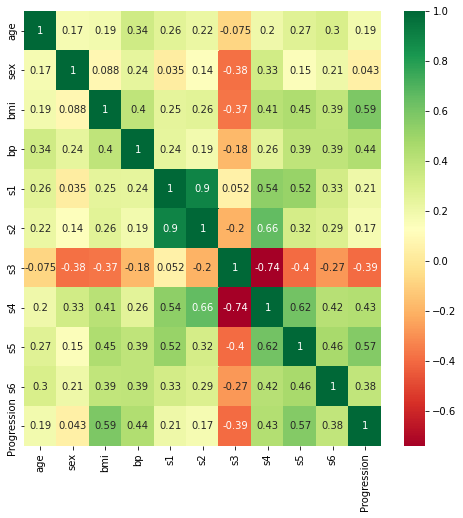

In [15]:
plt.subplots(figsize=(8,8))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

This plot shows the linear correlation between the variables within themselves & also variables with the target 'Progression'. This could be a phase where the variables which are multicollinear can be eliminated. Since this example will serve as an example of methodology followed in builiding a model, we are not going for feature selection (which will be an article in itself). 

# MODELLING

**1) Create Features & Target.**

---

We will create an variable 'x' which will hold all the feature columns & another
variable 'y' which will hold the target column.

In [16]:
#independent variables / explanatory variables
x = db_df.drop(labels='Progression', axis=1)  #axis=1 means we drop data by column.

#dependent variable / response / target variable.
y = db_df['Progression']
y.shape

(442,)

---
Now x contains independent variables & y the target variable instances.

**2) Create a train test split here**

In [17]:
#splitting the dataset into 75%-25% train-test split 
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.25,random_state=999)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(331, 10)
(111, 10)
(331,)
(111,)


**3) Create instance of a model**

In [18]:
#let us import the linear regression from sklearn & create instance of the model.

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [19]:
print(lm)
print(type(lm))

LinearRegression()
<class 'sklearn.linear_model._base.LinearRegression'>


**4) Fit the model by passing:**

1. **Independent variables: train_x**
2. **Dependent : train_y ,**

**& training the model**

In [20]:
lm.fit(train_x, train_y)

LinearRegression()

Now the model is trained, so we can now pass the test features to get predictions out of the model. Let, us do that.

**5) Predict the progression of diabetes based on test data** 

In [21]:
predicted_y = lm.predict(test_x)

Now that we have predicted the 'Progression', it is time to evaluate the model which we have made.

**6) Evaluate the Model**

In [22]:
#let us import metrics from sklearn to evaluate the model. Refer https://scikit-learn.org/stable/modules/model_evaluation.html for more details.
from sklearn import metrics as mt

In [23]:
print("1) The model explains,", np.round(mt.explained_variance_score(test_y,predicted_y)*100,2),"% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(test_y,predicted_y ),2))
print("3) The R-Square score of the model is " , np.round(mt.r2_score(test_y,predicted_y),2))

1) The model explains, 57.57 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 38.08
3) The R-Square score of the model is  0.56


**Below are the Coefficients & intercepts of the Regression Equation as calculated by the model.**

In [24]:
coeff = pd.Series(lm.coef_, index = train_x.columns)
intercept = lm.intercept_

In [25]:
print("Coefficients:\n")
print(coeff)
print("\n")
print("Intercept:\n")
print(intercept)
print("\n")


Coefficients:

age     54.820535
sex   -260.930304
bmi    458.001802
bp     303.502332
s1    -995.584889
s2     698.811401
s3     183.095229
s4     185.698494
s5     838.503887
s6      96.441048
dtype: float64


Intercept:

154.42752615353518




**The regression Equation would be :**

**Diabetes Progression = Intercept + coeff(1) X age + coeff(2) X sex +.....+ coeff(10) X s6**


---




## Let us use another package called Statsmodel & build another model. Statsmodel 
## package gives a better summary of the model parameters w.r.t Linear Regression

In [26]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In this package we pass the Predictor column & the input columns through OLS function to build & train the model. There is no train-test split since this is regression model & accuracy is calculated based on the closeness of predictions, unlike categories in classification case. SK-Learn is basically a package for prediction which is why we had to do a train-test split.

In [27]:
db_df.head(0)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression


In [28]:
lm2 = sm.OLS.from_formula("Progression ~ age+sex+bmi+bp+s1+s2+s3+s4+s5+s6", data=db_df)
# Predictor -> Progression
# Features -> age, sex etc.We are using '+' sign to just indicate all columns to be considered. There is no addition happening.

trained_lm2 = lm2.fit()

In [29]:
predictions = trained_lm2.predict(x)

In [30]:
predictions.head()

0    206.117070
1     68.072348
2    176.884060
3    166.917966
4    128.459842
dtype: float64

In [31]:
summary_model = trained_lm2.summary()
print(summary_model)

                            OLS Regression Results                            
Dep. Variable:            Progression   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 31 May 2022   Prob (F-statistic):           3.83e-62
Time:                        12:31:38   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.0

---

Let us analyze the summary of the Linear Regression Model we have created.

1. **Adj. R Squared : 0.507** - 50.7% of the variation in the predictor variable "Progression" can be explained by the features / independent variable.(We do not consider R-Squared since it does not account for bias)

2. **Prob (F-statistic):3.83e-62** - This low a value would imply that at least some of the regression parameters are nonzero and that the regression equation does have some validity in fitting the data (i.e., the independent variables are not purely random with respect to the dependent variable).

3. **Durbin-Watson:2.029** - Durbin Watson test is a test for Homoscedasticity.If Durbin Watson score is 2 then there is no correlation. If less than 2 the independent variables are positively correlated & if more than 2, then it is negatively correlated. In our case, since the score is close to 
, we can assume there is no correlation among the residuals.


